<a href="https://colab.research.google.com/github/lyhue1991/colaboratory/blob/master/test_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_____

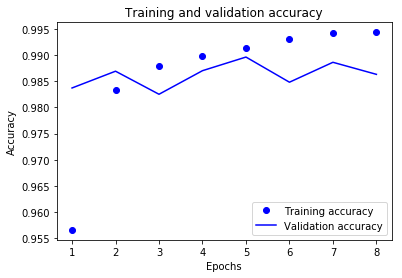

top_2_accuracy =  0.9973


In [0]:
# coding=utf-8
from __future__ import print_function
from __future__ import division

__author__ = 'Python_Ai_Road'

# ======================================================================
# 〇，设置gpu使用量控制

import os
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

os.environ["CUDA_VISIBLE_DEVICES"] = "0" #有多个GPU时可以指定只使用第几号GPU
config = tf.ConfigProto()
config.allow_soft_placement=True #允许动态放置张量和操作符
config.gpu_options.per_process_gpu_memory_fraction = 0.4 #最多使用40%GPU内存
config.gpu_options.allow_growth=True   #初始化时不全部占满GPU显存, 按需分配 
sess = tf.Session(config = config)
set_session(sess)


# ======================================================================
# 一，准备数据

from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255


# ======================================================================
# 二，构建模型

from keras import models,layers
from keras import backend as K
K.clear_session()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3) ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

# ======================================================================
# 三，训练模型

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', # 注意此处loss形式针对未作Onehot的分类标签
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=8,
          batch_size=64,validation_data =(x_test,y_test))


# ======================================================================
# 四，评估模型

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'

dfhistory = pd.DataFrame(history.history)
dfhistory.index = range(1,len(dfhistory) + 1)
dfhistory.index.name = 'epoch'
dfhistory.to_csv('hitory_metrics',sep = '\t')


acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# ======================================================================
# 五，使用模型

from keras import metrics

# 计算top_2_accuracy
y_pred = model.predict(x_test)

top_2_accuracy = K.eval(metrics.sparse_top_k_categorical_accuracy(y_test,y_pred,k = 2))

print('top_2_accuracy = ',top_2_accuracy)


# ======================================================================
# 六，保存模型

model.save('minst_model.h5')

######
#####
####
###
##
#